In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
train = pd.read_csv("data/train.tsv", sep='\t')

In [12]:
train.head()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619


In [17]:
train[train['bot']==1].describe()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
count,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.00000,243.000000,243.000000,243.000000,243.000000,243.000000,2.430000e+02,243.000000,243.000000,243.000000
mean,1641.193416,1.0,705.403292,0.658436,0.193416,898.263374,268.73251,220.069959,0.152263,19.172840,34048.654321,0.713637,4.692744e+04,86.173217,1.805527,0.295789
std,882.156013,0.0,2403.087159,0.475213,0.395791,633.124696,1019.93348,802.110120,0.360018,72.481025,17141.008604,0.170023,1.271824e+05,28.794490,2.529442,0.264483
min,35.000000,1.0,0.000000,0.000000,0.000000,22.000000,1.00000,0.000000,0.000000,0.000000,3247.000000,0.079812,1.000000e+00,13.166667,1.000000,0.000000
25%,940.000000,1.0,24.500000,0.000000,0.000000,422.000000,9.00000,0.000000,0.000000,0.000000,19808.000000,0.626281,2.384341e+03,70.293506,1.000000,0.057898
50%,1732.000000,1.0,87.000000,1.000000,0.000000,866.000000,32.00000,4.000000,0.000000,1.000000,32359.000000,0.730435,1.056761e+04,88.176471,1.111111,0.237569
75%,2394.000000,1.0,310.000000,1.000000,0.000000,1255.500000,119.00000,48.000000,0.000000,6.000000,49069.500000,0.825366,3.539367e+04,102.480769,1.722611,0.476366
max,3152.000000,1.0,19096.000000,1.000000,1.000000,3796.000000,8705.00000,7646.000000,1.000000,576.000000,76384.000000,1.000000,1.139015e+06,195.257143,29.000000,1.000000


In [18]:
train[train['bot']==0].describe()

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
count,1345.000000,1345.0,1345.000000,1345.000000,1345.000000,1345.00000,1.345000e+03,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,1586.307807,0.0,3636.636431,0.228996,0.001487,1721.22974,3.386648e+03,1147.754647,0.501115,96.673606,45403.576208,0.669399,8280.362097,93.294223,3.119128,0.352628
std,911.966902,0.0,8885.116391,0.420343,0.038547,13397.27522,3.682580e+04,4587.608652,0.500185,398.788614,17361.478393,0.134652,20644.976787,17.461731,21.144322,0.244302
min,0.000000,0.0,0.000000,0.000000,0.000000,16.00000,3.000000e+00,0.000000,0.000000,0.000000,2744.000000,0.005000,-15.654494,29.099099,1.000000,0.000000
25%,796.000000,0.0,320.000000,0.000000,0.000000,299.00000,1.530000e+02,33.000000,0.000000,8.000000,33611.000000,0.625000,998.426230,82.160256,1.250000,0.133333
50%,1614.000000,0.0,1025.000000,0.000000,0.000000,599.00000,3.920000e+02,181.000000,1.000000,22.000000,50024.000000,0.689831,3291.327586,93.180723,1.727273,0.342466
75%,2363.000000,0.0,3287.000000,0.000000,0.000000,1227.00000,1.009000e+03,738.000000,1.000000,66.000000,57315.000000,0.754673,8203.069767,104.234043,2.530303,0.549180
max,3175.000000,0.0,137264.000000,1.000000,1.000000,373374.00000,1.141862e+06,113640.000000,1.000000,9491.000000,78841.000000,1.000000,380028.250000,287.875912,767.588235,1.000000


friend_countで箱ひげ図を書いてみる

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


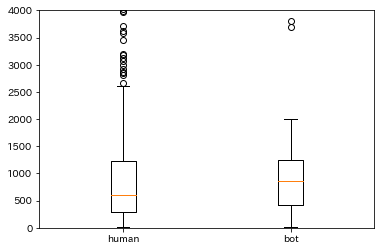

In [20]:
hm_fc = train.loc[train['bot']==0,'friends_count']
bt_fc = train.loc[train['bot']==1,'friends_count']
val = ( hm_fc, bt_fc)
fig,ax = plt.subplots()
bp=ax.boxplot(val)
ax.set_xticklabels(['human','bot'])
plt.ylim([0,4000])
plt.show()

In [58]:
def drawBoxplot(data, col, y_max=-1):
    # データの取得
    x1 = data.loc[data['bot']==0,col]
    x2 = data.loc[data['bot']==1,col]
    val = ( x1, x2 )
    
    # 描画の準備
    fig, ax = plt.subplots()
    bp = ax.boxplot(val)
    ax.set_xticklabels(['human','bot'])
    
    # 最大、最小の決定
    x1_q1, x1_q3 = np.percentile(x1, [25, 75])
    x1_iqr = x1_q3 - x1_q1
    x2_q1, x2_q3 = np.percentile(x2, [25, 75])
    x2_iqr = x2_q3 - x2_q1
    x1_lower = x1_q1 - (x1_iqr * 0.5)
    x1_upper = x1_q3 + (x1_iqr * 0.5)
    x2_lower = x2_q1 - (x2_iqr * 1.5)
    x2_upper = x2_q3 + (x2_iqr * 1.5)
    if ( x1_lower < x2_lower):
        lower = x1_lower
    else:
        lower = x2_lower
    if ( x1_upper > x2_upper):
        upper = x1_upper
    else:
        upper = x2_upper
    plt.ylim([lower, upper])

    plt.show()
    return

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


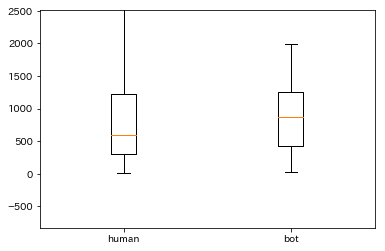

In [59]:
drawBoxplot(train, 'friends_count',3000)

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


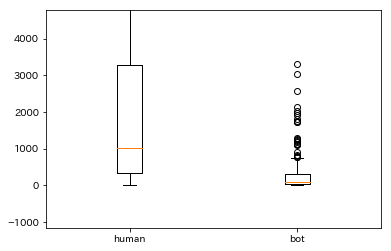

In [60]:
drawBoxplot(train,'statuses_count')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


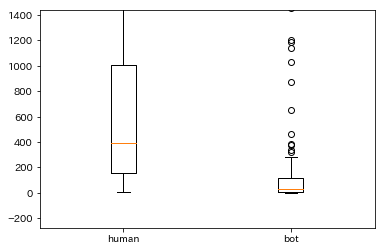

In [61]:
drawBoxplot(train, 'followers_count')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


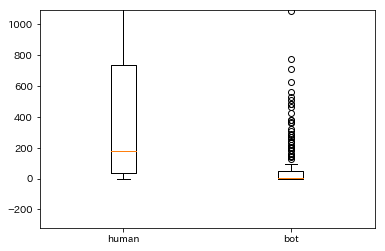

In [62]:
drawBoxplot(train,'favourites_count')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


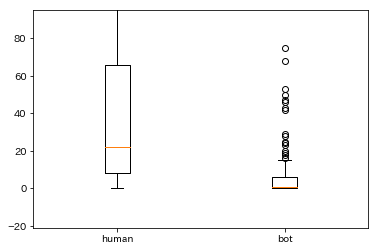

In [63]:
drawBoxplot(train,'listed_count')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


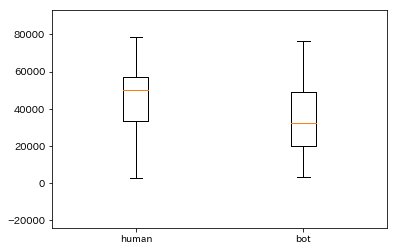

In [64]:
drawBoxplot(train,'account_age_hours')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


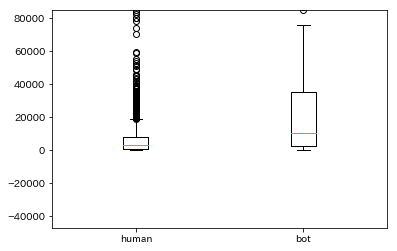

In [65]:
drawBoxplot(train,'mean_mins_between_tweets')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


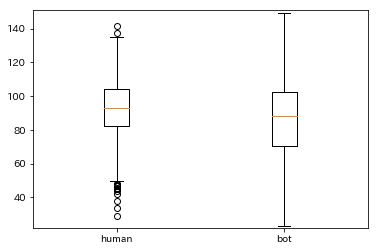

In [66]:
drawBoxplot(train,'mean_tweet_length')

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


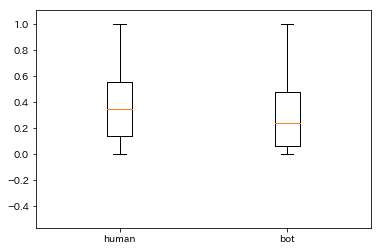

In [67]:
drawBoxplot(train,"reply_rate")

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


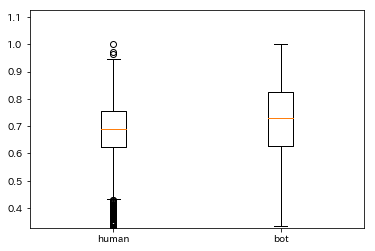

In [68]:
drawBoxplot(train,"diversity")

In [69]:
train[train['bot']==1].head(30)

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
13,35,1,37,1,0,22,4,1,0,0,20815,0.857143,61832.714286,106.333333,1.000000,0.266667
14,38,1,12,1,1,996,1,0,0,0,35905,0.765957,20838.181818,82.750000,1.000000,0.833333
28,73,1,2,1,1,1664,8,0,0,1,46313,1.000000,192125.000000,68.000000,2.000000,0.000000
38,88,1,337,1,1,1626,16,1,0,0,41076,0.211391,108.479798,85.753769,1.000000,0.889447
39,89,1,58,1,1,1324,21,2256,0,1,7546,0.611940,4410.543478,44.744681,1.666667,0.893617
41,91,1,71,1,0,84,116,160,0,4,64447,0.804000,56124.421875,61.815385,1.000000,0.692308
50,105,1,77,0,0,751,108,5,0,5,44037,0.804878,12147.743590,95.600000,1.166667,0.050000
53,111,1,10,1,0,1972,37,0,0,0,14811,0.857143,14485.222222,51.900000,1.000000,0.200000
57,116,1,25,1,0,1975,10,1,0,0,29598,0.730435,72850.818182,82.826087,1.000000,0.217391
60,123,1,5,0,0,563,99,0,0,10,43008,0.967742,438262.000000,101.333333,1.000000,0.000000


In [70]:
train[train['bot']==0].head(30)

,id,bot,statuses_count,default_profile,default_profile_image,friends_count,followers_count,favourites_count,geo_enabled,listed_count,account_age_hours,diversity,mean_mins_between_tweets,mean_tweet_length,mean_retweets,reply_rate
0,0,0,715,0,0,423,206,150,1,34,36981,0.684902,3958.863636,97.513514,1.473684,0.504505
1,2,0,2151,0,0,1457,1321,1704,1,90,35603,0.704787,2746.533708,69.988827,3.814815,0.553073
2,3,0,439,0,0,691,213,5,0,15,38432,0.528857,11005.031847,75.101266,1.142857,0.158228
3,7,0,28,1,0,285,31,0,0,1,4898,0.810427,6495.666667,93.029412,3.000000,0.029412
4,12,0,40,0,0,907,60,1013,1,2,47238,0.831579,112167.300000,79.142857,1.000000,0.047619
5,16,0,33,1,0,195,68,56,0,6,23170,0.964286,94795.700000,98.454545,2.428571,0.181818
6,19,0,2628,0,0,408,332,118,1,23,52625,0.704309,1364.451852,93.125000,1.615385,0.352941
7,21,0,1506,1,0,1992,511,7,0,18,16940,0.321558,230.487437,87.030000,1.111111,0.000000
8,24,0,533,0,0,625,180,68,0,15,41013,0.772152,5910.296774,113.826923,1.684211,0.153846
9,25,0,1247,0,0,389,217,8,1,11,33089,0.726510,4422.991935,78.344000,1.166667,0.216000
